# Titanic survived Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This dataset contains details of customers in which both numerical and categorical data is present. In this dataset 'Survived'
is our target variable as all the other independent columns helps in determining how many people survived that disaster.

Since name, ticket and cabin didn't seem to affect much the dataset or the target variable, hence they can be dropped
base on further analysis.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

In [32]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that column age,cabin and emarked are having null values. 

<Axes: >

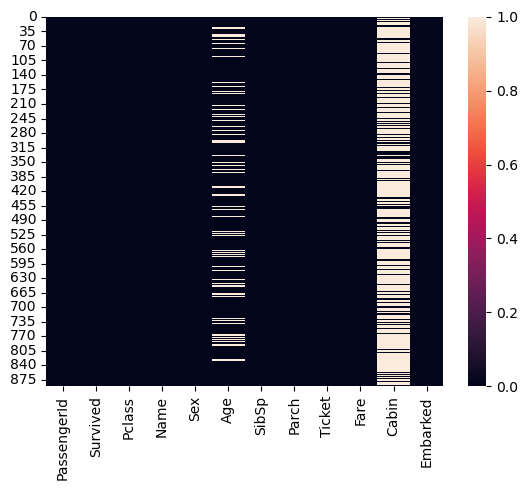

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset contain three datatypes(int64,object,float64)

# Droping columns not affecting dataset

Since name, ticket and cabin(contains 77% null values) didn't seem to affect much the dataset or the target variable, hence they can be dropped.

In [22]:
df.drop(['Cabin','Ticket'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

# Filling null values in age and embarked columns with meadian and mode respectively.

In [26]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [27]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Null values have been filled

# Summary of data

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1) Total count in all columns are same.
2) mean>meadian in all columns except Pclass where mean<meadian but these variations are less so slight skewness might be present.
3) Large gaps between 75th percentile and max value can be seen almost in all the columns hence outliers are present.

In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Data Visualisation

0    549
1    342
Name: Survived, dtype: int64


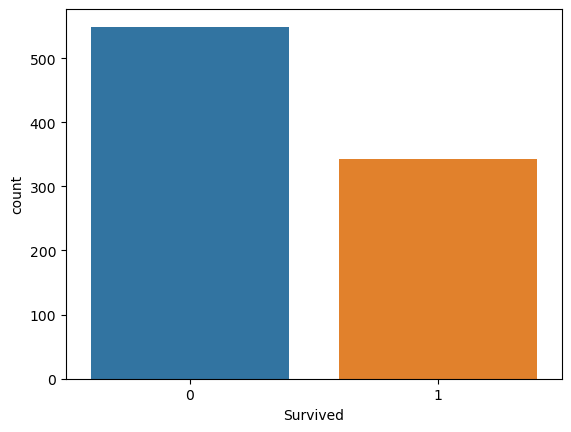

In [38]:
print(df['Survived'].value_counts())
ab=sns.countplot(x='Survived',data=df)
plt.show()

0= No
1= Yes

3    491
1    216
2    184
Name: Pclass, dtype: int64


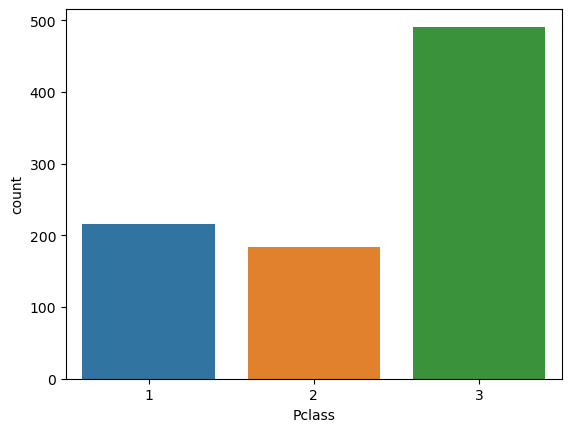

In [39]:
print(df['Pclass'].value_counts())
ab=sns.countplot(x='Pclass',data=df)
plt.show()

male      577
female    314
Name: Sex, dtype: int64


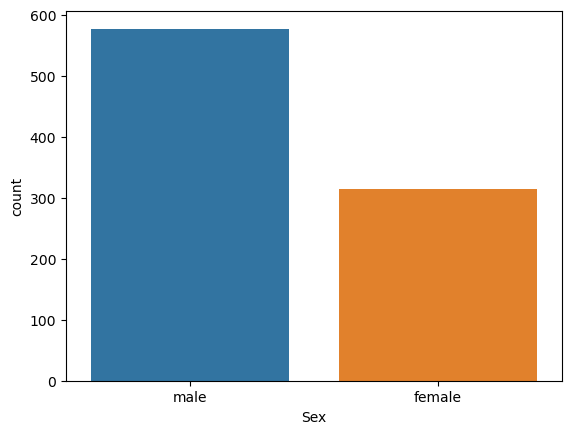

In [41]:
print(df['Sex'].value_counts())
ab=sns.countplot(x='Sex',data=df)
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


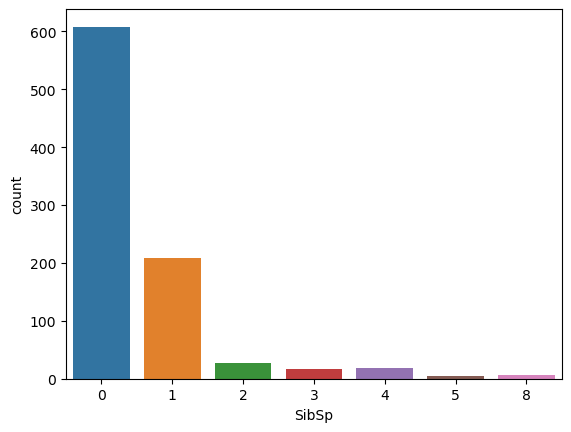

In [43]:
print(df['SibSp'].value_counts())
ab=sns.countplot(x='SibSp',data=df)
plt.show()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


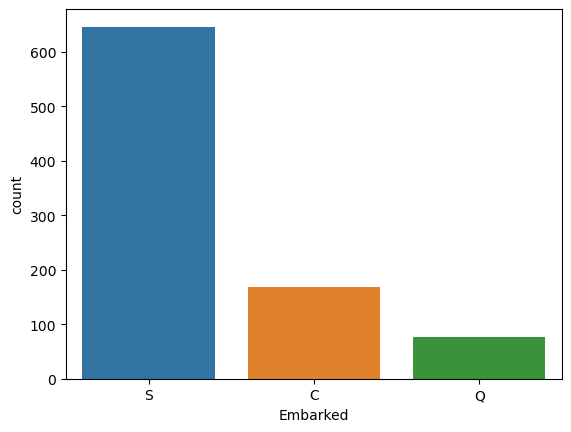

In [45]:
print(df['Embarked'].value_counts())
ab=sns.countplot(x='Embarked',data=df)
plt.show()

S= Southampton
C= Cherbourg
Q= Queenstown

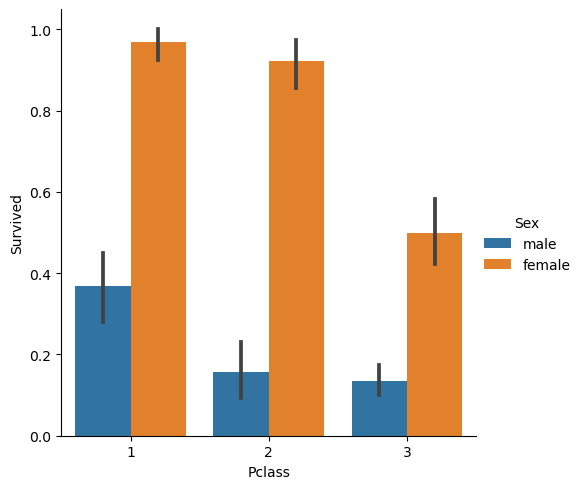

In [46]:
#how many male and femal and to which class survived
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar')
plt.show()

In each class no. females survived are more than males
In class 1 highest no. of females survived. And class 3 passengers survival rate is least among all the classes.

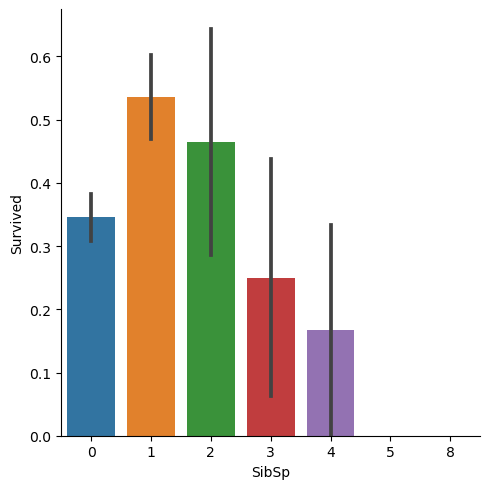

In [48]:
#how many siblings and spouses survived
sns.catplot(x='SibSp',y='Survived',data=df,kind='bar')
plt.show()

paseengers with 1 sibling or spouse most likely surved among rest

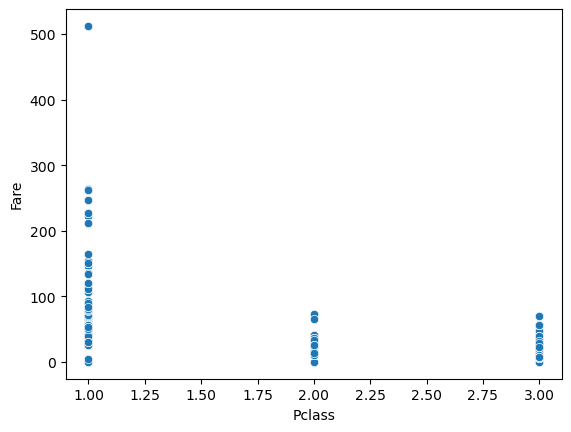

In [49]:
sns.scatterplot(x='Pclass',y='Fare',data=df)
plt.show()

The fare for class 1 passengers is highest

# Seperating categorical and numerical columns

In [51]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)

categorical columns: ['Sex', 'Embarked']


numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


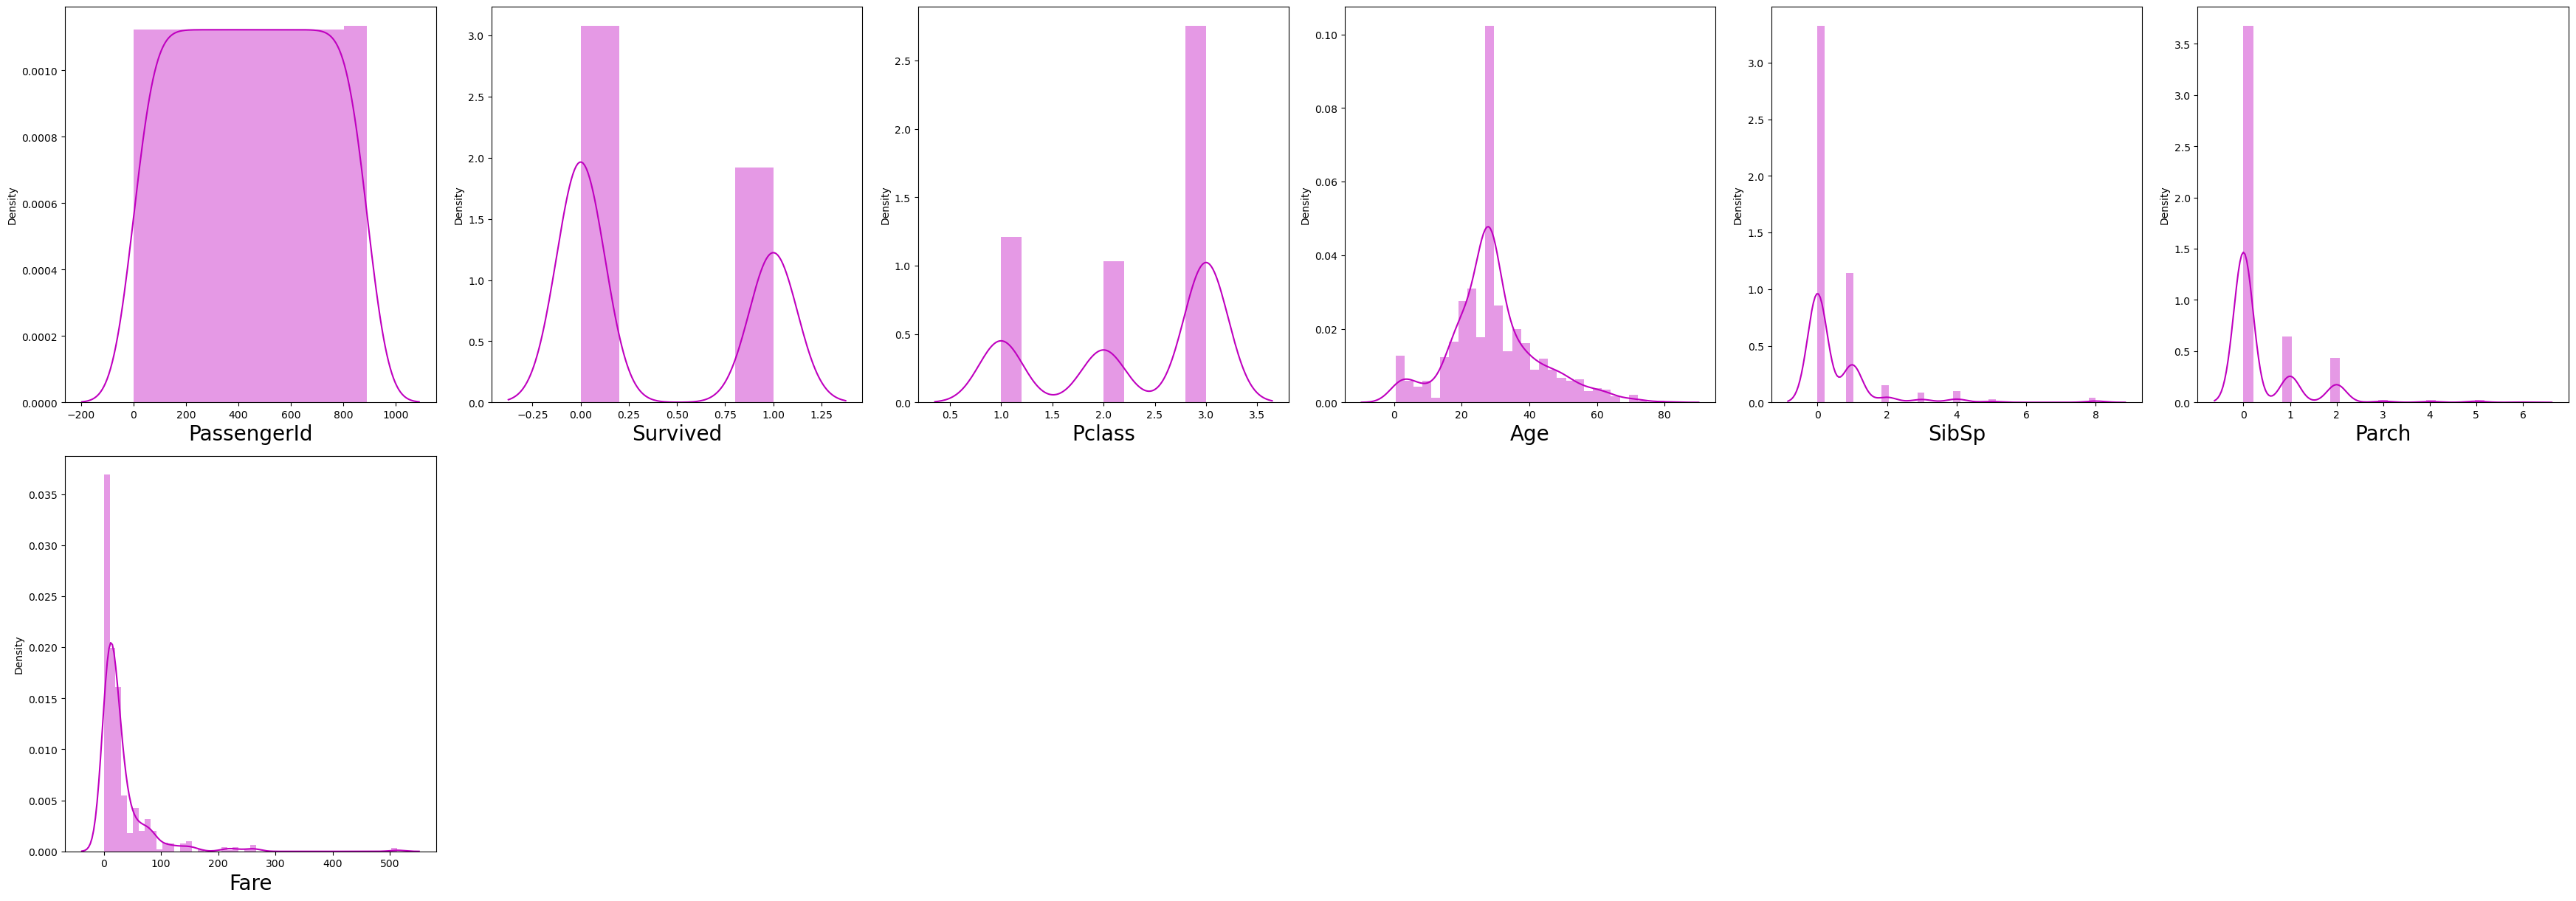

In [53]:
#seeing skewness
plt.figure(figsize=(35,30), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()    
plt.show()    

In Pclass data skewed towards left and in sibsp,parch,fare data is skewed towards right

# Checking for outliers

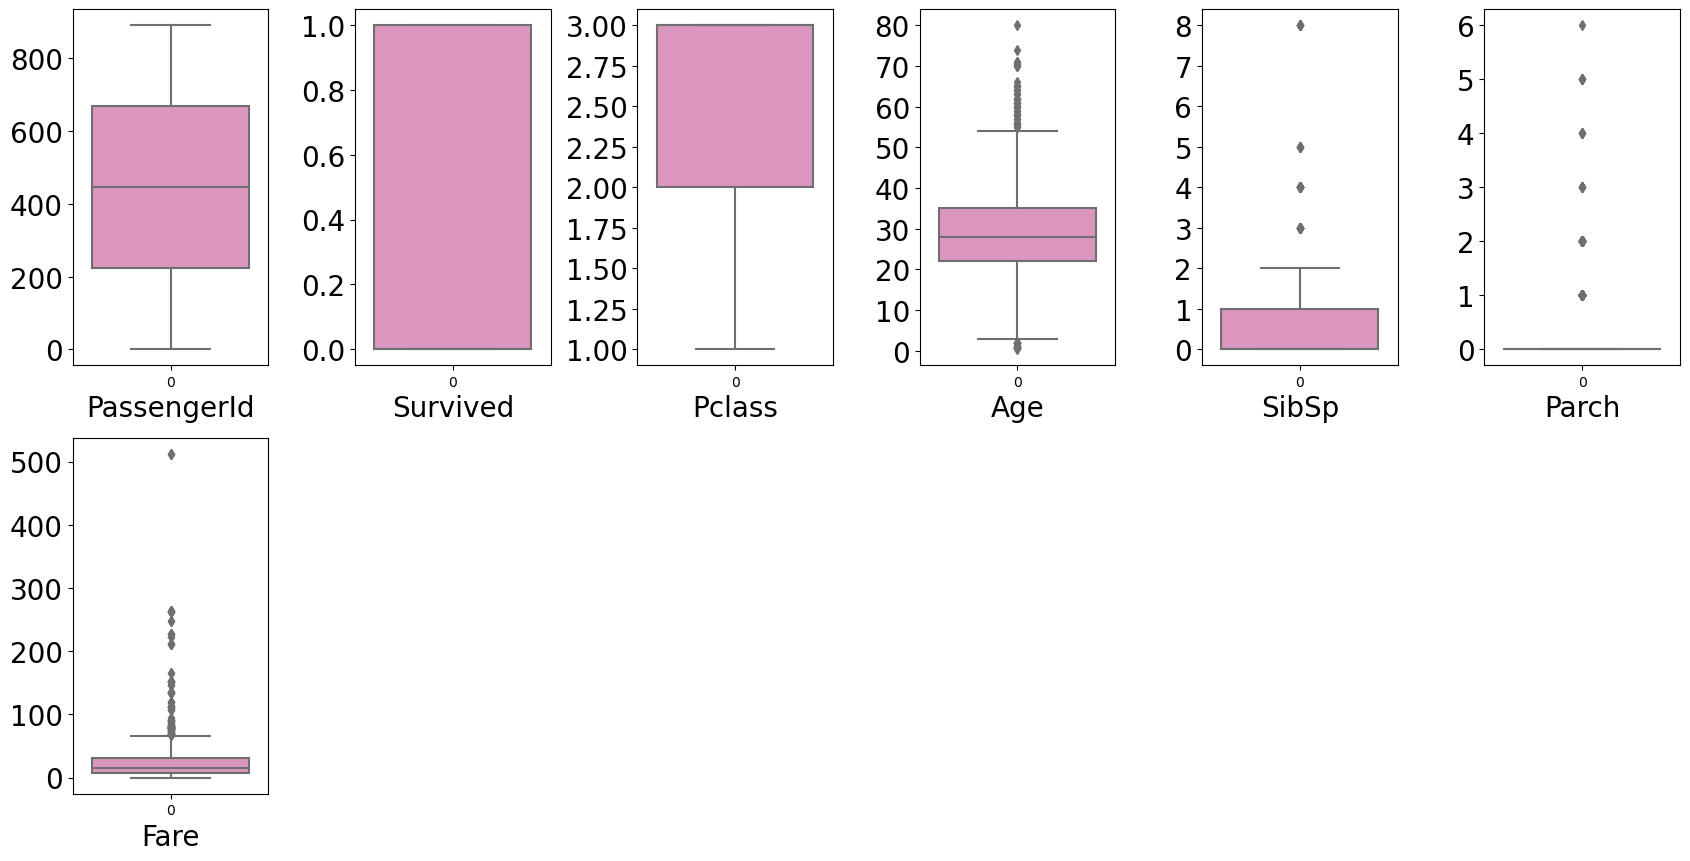

In [54]:
plt.figure(figsize=(17,21), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(5,6,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col,fontsize=20)
        plt.yticks(rotation=0,fontsize=20)
    plotnumber+=1
plt.tight_layout()    
plt.show()    

Outliers present in age,sibsp,parch,fare.

In [66]:
from scipy.stats import zscore

In [67]:
dfs=df.copy()

In [68]:
out=dfs[['Age','SibSp','Parch','Fare']]
z=np.abs(zscore(out))
z

,Age,SibSp,Parch,Fare
0,0.565736,0.432793,0.473674,0.502445
1,0.663861,0.432793,0.473674,0.786845
2,0.258337,0.474545,0.473674,0.488854
3,0.433312,0.432793,0.473674,0.420730
4,0.433312,0.474545,0.473674,0.486337
...,...,...,...,...
886,0.181487,0.474545,0.473674,0.386671
887,0.796286,0.474545,0.473674,0.044381
888,0.104637,0.432793,2.008933,0.176263
889,0.258337,0.474545,0.473674,0.044381


In [69]:
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 0, 3, 1, 1, 3, 2,
        2, 0, 2, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 1, 1, 1,
        1, 1, 0, 2, 1, 2], dtype=int64))

In [70]:
z.iloc[13,2]

5.73284383018578

In [71]:
df1=dfs[(z<3).all(axis=1)]

In [75]:
#new data after removing outliers
df1.shape

(820, 9)

In [76]:
#Original data
df.shape

(891, 9)

In [74]:
print('Data loss :',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss : 7.968574635241302


# Encoding Emarked and Sex column to convert data into numerical data before checking skewness.

In [58]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()
list1= ['Embarked','Sex']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(object))

In [63]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


male=1
female=0
S=2
C=0
Q=1

In [80]:
df1.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.401952
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
dtype: float64

In [82]:
df1['Fare']=np.cbrt(df1['Fare'])

In [83]:
df1.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.401952
SibSp          1.979577
Parch          2.122629
Fare           0.708623
Embarked      -1.277386
dtype: float64

In [84]:
from scipy.stats import boxcox

In [85]:
columns=['Pclass','SibSp','Parch','Fare']

In [86]:
for col in columns:
    df1[col], _=boxcox(df1[col] + 1)

In [87]:
df1.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.429718
Sex           -0.664152
Age            0.401952
SibSp          0.948944
Parch          1.581505
Fare           0.135122
Embarked      -1.277386
dtype: float64

Data has been skewed

# Checking correlation

In [88]:
df1.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.013852,-0.026100,0.066160,0.009015,-0.037668,0.018666,-0.018060,0.019099
Survived,-0.013852,1.000000,-0.322666,-0.554888,-0.086026,0.158793,0.211061,0.359534,-0.154994
Pclass,-0.026100,-0.322666,1.000000,0.142759,-0.326201,-0.136516,-0.087302,-0.644262,0.097043
Sex,0.066160,-0.554888,0.142759,1.000000,0.091656,-0.212974,-0.252655,-0.268260,0.116708
Age,0.009015,-0.086026,-0.326201,0.091656,1.000000,-0.092681,-0.235673,0.147710,0.001121
SibSp,-0.037668,0.158793,-0.136516,-0.212974,-0.092681,1.000000,0.347320,0.385400,-0.058986
Parch,0.018666,0.211061,-0.087302,-0.252655,-0.235673,0.347320,1.000000,0.293109,-0.028470
Fare,-0.018060,0.359534,-0.644262,-0.268260,0.147710,0.385400,0.293109,1.000000,-0.190599
Embarked,0.019099,-0.154994,0.097043,0.116708,0.001121,-0.058986,-0.028470,-0.190599,1.000000


<Axes: >

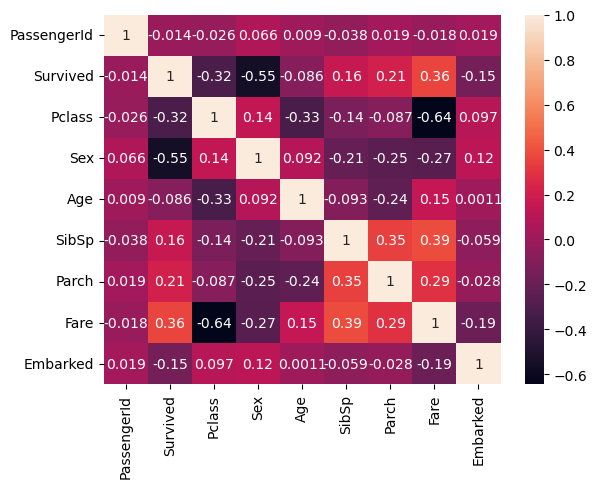

In [89]:
sns.heatmap(df1.corr(),annot=True)

Data are very less correlated with the target variable.
There is no multicolinearity issue

# Seperating the data

In [90]:
x=df1.drop('Survived',axis=1)
y=df1['Survived']

In [91]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

As we can see data is not balanced so we'll do oversampling to balance it

In [92]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [93]:
y1.value_counts()

0    500
1    500
Name: Survived, dtype: int64

Target variable data balanced

# Model building

In [99]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [95]:
maxAccu=0
maxRS=0
for i in range(1,220):
    x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size=.30,random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum accuracy score is:',maxAccu, 'at random state:',maxRS)

Maximum accuracy score is: 0.8566666666666667 at random state: 22


# Again predicting Logistic Regression with best random state

In [96]:
x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [97]:
lg= LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy score:',accuracy_score(y_test, predlg))
print('confusion matrix :\n',confusion_matrix(y_test, predlg))
print('classification report :\n',classification_report(y_test, predlg))

accuracy score: 0.8566666666666667
confusion matrix :
 [[124  25]
 [ 18 133]]
classification report :
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       149
           1       0.84      0.88      0.86       151

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



# Checking with Random Forest Classifier

In [98]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print('accuracy score:',accuracy_score(y_test, predRFC))
print('confusion matrix :\n',confusion_matrix(y_test, predRFC))
print('classification report :\n',classification_report(y_test, predRFC))

accuracy score: 0.8633333333333333
confusion matrix :
 [[127  22]
 [ 19 132]]
classification report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       149
           1       0.86      0.87      0.87       151

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [104]:
models=[GaussianNB(),
        KNeighborsClassifier(),
        SVC(),
        ExtraTreeClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier(),
        RandomForestClassifier(),
        LogisticRegression()]

In [105]:
for m in models:
    m.fit(x_train,y_train)
    pred_m=m.predict(x_test)
    print('Model prediction for :',m)
    print('accuracy score:',accuracy_score(y_test, pred_m))
    print('confusion matrix :\n',confusion_matrix(y_test, pred_m))
    print('classification report :\n',classification_report(y_test, pred_m))
    print('\n')

Model prediction for : GaussianNB()
accuracy score: 0.82
confusion matrix :
 [[115  34]
 [ 20 131]]
classification report :
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       149
           1       0.79      0.87      0.83       151

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



Model prediction for : KNeighborsClassifier()
accuracy score: 0.59
confusion matrix :
 [[86 63]
 [60 91]]
classification report :
               precision    recall  f1-score   support

           0       0.59      0.58      0.58       149
           1       0.59      0.60      0.60       151

    accuracy                           0.59       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.59      0.59      0.59       300



Model prediction for : SVC()
accuracy score: 0.48333333333333334
confusion matrix :
 [

# Cross validation to check actual performance of these above models

In [102]:
from sklearn.model_selection import cross_val_score

In [106]:
for m in models:
    score=cross_val_score(m,x1,y1)
    print('Cross validation score for :',m)
    print('Model score :',score)
    print('mean score :',score.mean())
    print('difference between accuracy score and Cross validation score :',accuracy_score(y_test, pred_m)-score.mean())
    print('\n')

Cross validation score for : GaussianNB()
Model score : [0.71  0.775 0.745 0.865 0.86 ]
mean score : 0.7909999999999999
difference between accuracy score and Cross validation score : 0.06566666666666676


Cross validation score for : KNeighborsClassifier()
Model score : [0.405 0.305 0.13  0.275 0.375]
mean score : 0.298
difference between accuracy score and Cross validation score : 0.5586666666666666


Cross validation score for : SVC()
Model score : [0.395 0.24  0.1   0.16  0.095]
mean score : 0.198
difference between accuracy score and Cross validation score : 0.6586666666666667


Cross validation score for : ExtraTreeClassifier()
Model score : [0.715 0.625 0.58  0.85  0.715]
mean score : 0.697
difference between accuracy score and Cross validation score : 0.15966666666666673


Cross validation score for : AdaBoostClassifier()
Model score : [0.36  0.535 0.23  0.41  0.48 ]
mean score : 0.4029999999999999
difference between accuracy score and Cross validation score : 0.4536666666666668

Among all the models Logistic Regression is our best model

# Hyper Parameter tuning

In [107]:
from sklearn.model_selection import GridSearchCV

In [109]:
parameters={'multi_class':['auto','ovr','multinomial'],'solver':['lbfgs','liblinear','sag','saga'],
            'max_iter':[100,300,500]}
gcvs=GridSearchCV(LogisticRegression(),parameters,cv=5)
gcvs.fit(x_train,y_train)
gcvs.best_params_

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'liblinear'}

# Final Model

In [110]:
final=LogisticRegression(max_iter=100,multi_class='auto',solver='liblinear')
final.fit(x_train,y_train)
pred_f=final.predict(x_test)
accu=accuracy_score(y_test,pred_f)

In [111]:
print(accu*100)

85.0


# Saving the model

In [112]:
import joblib
joblib.dump(final,'Titanic_people_survived.pkl')

['Titanic_people_survived.pkl']

# Final Prediction

In [113]:
prediction=final.predict(x_test)
original=np.array(y_test)
df_final=pd.DataFrame()
df_final['Predicted']= prediction
df_final['Original value']= original
df_final

,Predicted,Original value
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
295,0,1
296,1,1
297,0,0
298,1,1
